In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

In [2]:
df = yf.download(["MSFT", "KO", "TSLA"], start="2015-01-01")
df = df["Adj Close"]

[*********************100%%**********************]  3 of 3 completed


In [3]:
df

,KO,MSFT,TSLA
Date,,,
2015-01-02,31.850182,40.452736,14.620667
2015-01-05,31.850182,40.080738,14.006000
2015-01-06,32.092056,39.492474,14.085333
2015-01-07,32.492634,39.994225,14.063333
2015-01-08,32.885662,41.170788,14.041333
...,...,...,...
2023-11-16,57.150002,376.170013,233.589996
2023-11-17,57.259998,369.850006,234.300003
2023-11-20,57.400002,377.440002,235.600006


In [4]:
ret_df = df.pct_change().dropna()

In [5]:
ret_df

,KO,MSFT,TSLA
Date,,,
2015-01-05,0.000000,-0.009196,-0.042041
2015-01-06,0.007594,-0.014677,0.005664
2015-01-07,0.012482,0.012705,-0.001562
2015-01-08,0.012096,0.029418,-0.001564
2015-01-09,-0.011032,-0.008405,-0.018802
...,...,...,...
2023-11-16,-0.001049,0.017583,-0.038091
2023-11-17,0.001925,-0.016801,0.003040
2023-11-20,0.002445,0.020522,0.005548


In [6]:
(ret_df + 1).cumprod() -1

,KO,MSFT,TSLA
Date,,,
2015-01-05,0.000000,-0.009196,-0.042041
2015-01-06,0.007594,-0.023738,-0.036615
2015-01-07,0.020171,-0.011334,-0.038120
2015-01-08,0.032511,0.017750,-0.039624
2015-01-09,0.021120,0.009196,-0.057681
...,...,...,...
2023-11-16,0.794338,8.299001,14.976699
2023-11-17,0.797792,8.142769,15.025260
2023-11-20,0.802188,8.330395,15.114176


<Axes: xlabel='Date'>

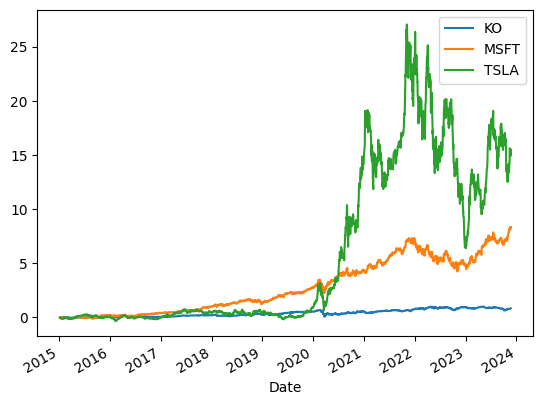

In [7]:
((ret_df + 1).cumprod() -1).plot()

In [8]:
# Average daily returns
ret_df.mean()

KO      0.000338
MSFT    0.001153
TSLA    0.001873
dtype: float64

In [9]:
# Risk
ret_df.std()

KO      0.011542
MSFT    0.017602
TSLA    0.035678
dtype: float64

In [10]:
# covariance (postive direction, no strength)
ret_df.cov()

,KO,MSFT,TSLA
KO,0.000133,0.000086,0.000075
MSFT,0.000086,0.000310,0.000259
TSLA,0.000075,0.000259,0.001273


In [11]:
ret_df.corr()

,KO,MSFT,TSLA
KO,1.000000,0.423350,0.182932
MSFT,0.423350,1.000000,0.413091
TSLA,0.182932,0.413091,1.000000


In [12]:
W = np.ones(len(ret_df.columns))/len(ret_df.columns)

In [13]:
W

array([0.33333333, 0.33333333, 0.33333333])

In [14]:
pf_exp = W.dot(ret_df.mean())

In [15]:
pf_std = (W.dot(ret_df.cov().dot(W)))**(1/2)

In [16]:
pf_exp

0.0011212969048862691

In [17]:
pf_std

0.016857255068695485

In [18]:
# Sharpe Ratio (higher the value the better)
pf_exp / pf_std

0.06651717022236657

In [19]:
# Sharpe Ratio Components
ret_df.mean() / ret_df.std()

KO      0.029261
MSFT    0.065511
TSLA    0.052498
dtype: float64

In [20]:
ret_df.mean(axis=1)

Date
2015-01-05   -0.017079
2015-01-06   -0.000473
2015-01-07    0.007875
2015-01-08    0.013317
2015-01-09   -0.012746
                ...   
2023-11-16   -0.007185
2023-11-17   -0.003946
2023-11-20    0.009505
2023-11-21    0.007722
2023-11-22   -0.005359
Length: 2238, dtype: float64

In [21]:
(ret_df.mean(axis=1) + 1).cumprod() -1

Date
2015-01-05   -0.017079
2015-01-06   -0.017544
2015-01-07   -0.009807
2015-01-08    0.003379
2015-01-09   -0.009410
                ...   
2023-11-16    7.859419
2023-11-17    7.824464
2023-11-20    7.908341
2023-11-21    7.977134
2023-11-22    7.929024
Length: 2238, dtype: float64

<Axes: xlabel='Date'>

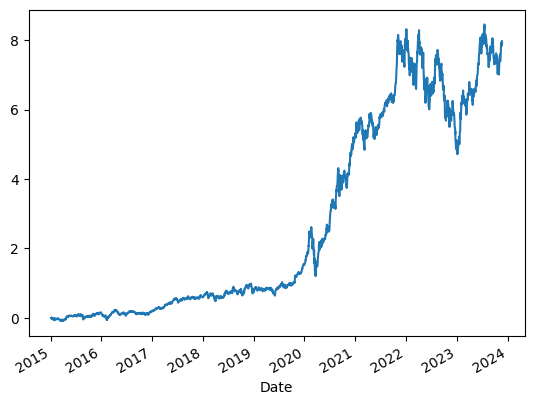

In [22]:
((ret_df.mean(axis=1) + 1).cumprod() -1).plot()